# Компьютерная геометрия и геометрическое моделирование
## Лабораторная работа №6
- Ф.И.О: **Мухамедияр Адиль**
- Ноиер студ. билета: **1032205725**
- Группа: **НКНбд-01-20**

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np
from PIL import Image

## №1

In [18]:
class Line:
    def __init__(self, A, B, C):
        self.A = A
        self.B = B
        self.C = C

    @staticmethod
    def from_points(p1, p2):
        # A = y2 - y1
        # B = x1 - x2
        # C = x2*y1 - x1*y2
        A = p2[1] - p1[1]
        B = p1[0] - p2[0]
        C = p2[0] * p1[1] - p1[0] * p2[1]
        return Line(A, B, C)

    def general_form(self):
        return self.A, self.B, self.C

    def slope_intercept_form(self):
        if self.B == 0:
            # Vertical line
            return float('inf'), None
        m = -self.A / self.B
        b = -self.C / self.B
        return m, b

    def parametric_form(self, t):
        if self.B == 0:
            return None
        x = t
        y = (-self.A * t - self.C) / self.B
        return x, y

    def direction_vector(self):
        return [self.B, -self.A]

    def normal_vector(self):
        return [self.A, self.B]

# Test the class
line = Line.from_points((1, 1), (2, 3))
general_form = line.general_form()
slope_intercept_form = line.slope_intercept_form()
parametric_point = line.parametric_form(2)
direction_vector = line.direction_vector()
normal_vector = line.normal_vector()

general_form, slope_intercept_form, parametric_point, direction_vector, normal_vector


((2, -1, -1), (2.0, -1.0), (2, 3.0), [-1, -2], [2, -1])

-----

## № 2

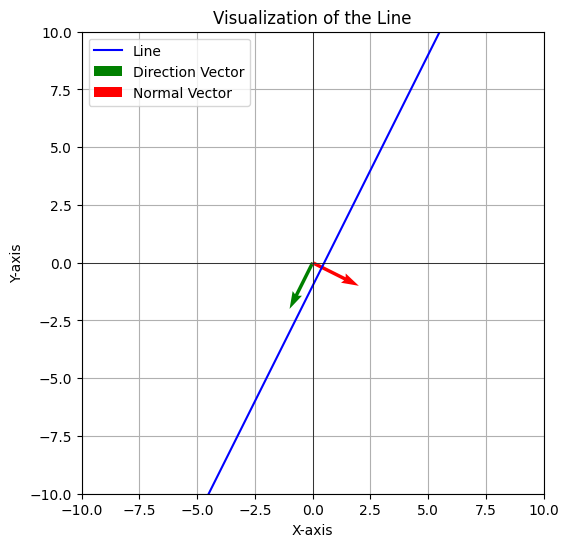

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_line(line, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Define range for x values
    x = np.linspace(-10, 10, 400)
    m, b = line.slope_intercept_form()

    # Check if the line is vertical
    if m == float('inf'):
        ax.axvline(-line.C/line.A, color='blue', label='Line')
    else:
        y = m*x + b
        ax.plot(x, y, color='blue', label='Line')

    # Plot direction vector
    dir_vector = line.direction_vector()
    ax.quiver(0, 0, dir_vector[0], dir_vector[1], angles='xy', scale_units='xy', scale=1, color='green', label='Direction Vector')

    # Plot normal vector
    norm_vector = line.normal_vector()
    ax.quiver(0, 0, norm_vector[0], norm_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Normal Vector')

    # Setting the aspect ratio, labels, title and legend
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.set_title('Visualization of the Line')
    ax.legend()

    plt.grid(True, which='both')
    plt.show()

# Plot the line
plot_line(line)


-----

## №3

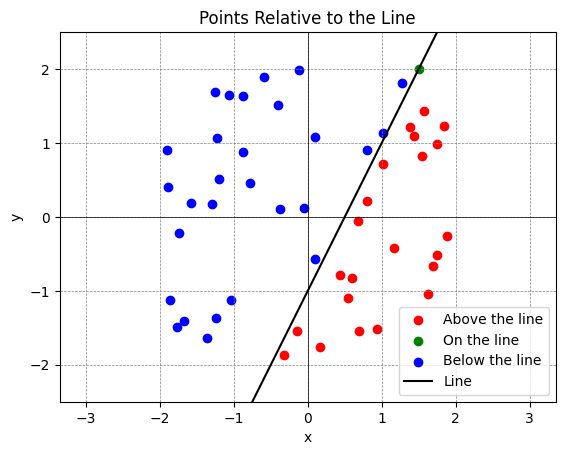

In [29]:
def generate_random_points(num_points=100, xlim=(-2, 2), ylim=(-2, 2)):
    """Generate a set of random points within the specified limits."""
    x_coords = np.random.uniform(xlim[0], xlim[1], num_points)
    y_coords = np.random.uniform(ylim[0], ylim[1], num_points)
    return x_coords, y_coords

def plot_points_relative_to_line(line, x_coords, y_coords):
    """Plot the points and color them based on their position relative to the line."""
    # Determine the position of each point relative to the line
    positions = line.A * x_coords + line.B * y_coords + line.C

    # Points above the line (positions > 0)
    above_x = x_coords[positions > 0]
    above_y = y_coords[positions > 0]

    # Points on the line (positions = 0)
    on_x = x_coords[positions==0]
    on_y = y_coords[positions==0]

    # Points below the line (positions < 0)
    below_x = x_coords[positions < 0]
    below_y = y_coords[positions < 0]

    # Plotting
    plt.scatter(above_x, above_y, color='r', label='Above the line')
    plt.scatter(on_x, on_y, color='g', label='On the line')
    plt.scatter(below_x, below_y, color='b', label='Below the line')

    # Plot the line itself
    x_values = np.linspace(-2.5, 2.5, 100)
    y_values = (-line.A * x_values - line.C) / line.B
    plt.plot(x_values, y_values, 'k-', label="Line")

    # Setting labels, title, legend, etc.
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Points Relative to the Line")
    plt.axvline(0, color='black',linewidth=0.5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.axis('equal')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.show()

# Generate random points
x_coords, y_coords = generate_random_points(num_points=50)

# Calculate the midpoint of the line and add it to the random points
midpoint_x = (1 + 2) / 2
midpoint_y = (1 + 3) / 2

x_coords = np.append(x_coords, midpoint_x)
y_coords = np.append(y_coords, midpoint_y)

# Plot the points relative to the previously defined line
plot_points_relative_to_line(line, x_coords, y_coords)

-----

## №4

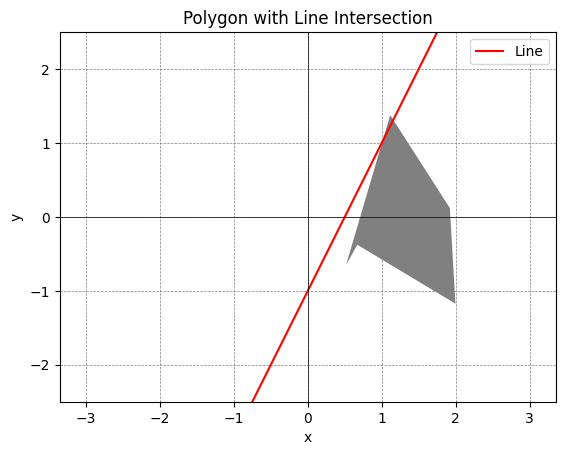

In [21]:
from shapely.geometry import LineString, Polygon as ShapelyPolygon

def generate_random_polygon(num_vertices=5, xlim=(-2, 2), ylim=(-2, 2)):
    """Generate a random polygon within the specified limits."""
    x_coords = np.random.uniform(xlim[0], xlim[1], num_vertices)
    y_coords = np.random.uniform(ylim[0], ylim[1], num_vertices)
    polygon = ShapelyPolygon(list(zip(x_coords, y_coords)))
    if polygon.is_valid:
        return polygon
    else:  # If the polygon is not valid (e.g., self-intersecting), regenerate it
        return generate_random_polygon(num_vertices, xlim, ylim)

def plot_polygon_with_line(polygon, line):
    """Plot the polygon and the line, filling the polygon if it's intersected by the line."""
    # Convert the polygon to a matplotlib polygon
    mpl_polygon = Polygon(list(polygon.exterior.coords), closed=True)

    # Create a shapely line
    x_values = np.linspace(-2.5, 2.5, 400)
    y_values = (-line.A * x_values - line.C) / line.B
    shapely_line = LineString(list(zip(x_values, y_values)))

    # Check if the line intersects the polygon
    intersection = polygon.intersects(shapely_line)

    # Plotting
    fig, ax = plt.subplots()
    ax.add_patch(mpl_polygon)
    if intersection:
        mpl_polygon.set_facecolor('gray')  # Fill the polygon if intersected
    else:
        mpl_polygon.set_facecolor('none')  # No fill if not intersected
    plt.plot(x_values, y_values, 'r-', label="Line")

    # Setting labels, title, etc.
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polygon with Line Intersection")
    plt.axvline(0, color='black',linewidth=0.5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.axis('equal')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.show()

# Generate a random polygon
polygon = generate_random_polygon()

# Plot the polygon with the previously defined line
plot_polygon_with_line(polygon, line)


-----

## №5

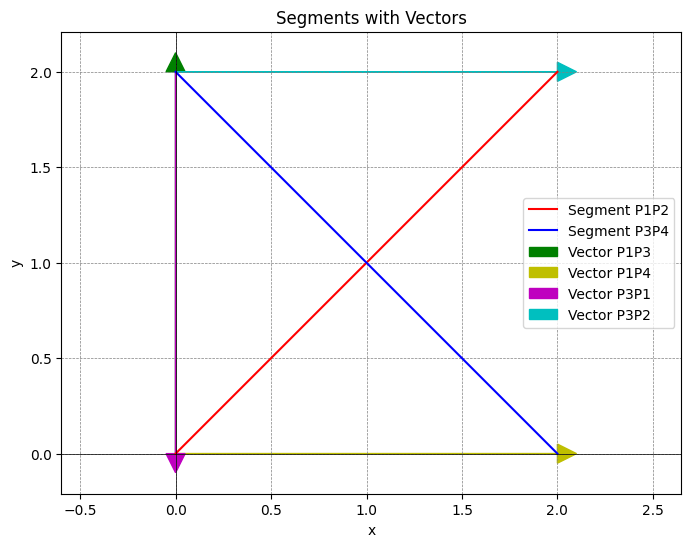

In [22]:
def plot_segments_with_vectors(segment_1, segment_2):
    """Plot the segments and the vectors used in the intersection algorithm."""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the segments
    ax.plot([segment_1[0][0], segment_1[1][0]], [segment_1[0][1], segment_1[1][1]], 'r-', label='Segment P1P2')
    ax.plot([segment_2[0][0], segment_2[1][0]], [segment_2[0][1], segment_2[1][1]], 'b-', label='Segment P3P4')

    # Plot the vectors
    ax.arrow(segment_1[0][0], segment_1[0][1], segment_2[0][0]-segment_1[0][0], segment_2[0][1]-segment_1[0][1],
             head_width=0.1, head_length=0.1, fc='g', ec='g', label="Vector P1P3")
    ax.arrow(segment_1[0][0], segment_1[0][1], segment_2[1][0]-segment_1[0][0], segment_2[1][1]-segment_1[0][1],
             head_width=0.1, head_length=0.1, fc='y', ec='y', label="Vector P1P4")

    ax.arrow(segment_2[0][0], segment_2[0][1], segment_1[0][0]-segment_2[0][0], segment_1[0][1]-segment_2[0][1],
             head_width=0.1, head_length=0.1, fc='m', ec='m', label="Vector P3P1")
    ax.arrow(segment_2[0][0], segment_2[0][1], segment_1[1][0]-segment_2[0][0], segment_1[1][1]-segment_2[0][1],
             head_width=0.1, head_length=0.1, fc='c', ec='c', label="Vector P3P2")

    # Setting labels, title, etc.
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Segments with Vectors")
    plt.axvline(0, color='black', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.axis('equal')
    plt.legend()
    plt.show()

# Define the segments for visualization
segment_1 = ((0, 0), (2, 2))
segment_2 = ((0, 2), (2, 0))

# Plot the segments with vectors
plot_segments_with_vectors(segment_1, segment_2)


-----

## №6

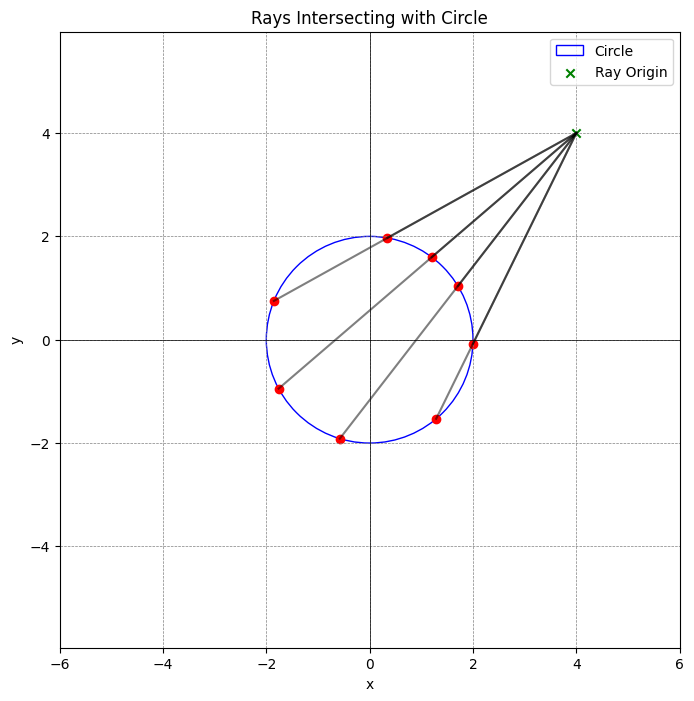

In [23]:
from shapely.geometry import Point, LineString

# Define the circle and the point
circle_center = (0, 0)
circle_radius = 2
point_outside = (4, 4)

# Function to find intersection points of a ray and a circle
def ray_circle_intersection(ray_origin, ray_direction, circle_center, circle_radius):
    # Calculate the coefficients for the quadratic equation
    dx, dy = ray_direction
    f, g = ray_origin
    a, b = circle_center

    A = dx**2 + dy**2
    B = 2 * (dx * (f - a) + dy * (g - b))
    C = (f - a)**2 + (g - b)**2 - circle_radius**2

    # Calculate the discriminant
    discriminant = B**2 - 4*A*C

    # If discriminant is negative, no intersection
    if discriminant < 0:
        return []

    # Calculate the two possible t values (parametric)
    t1 = (-B + discriminant**0.5) / (2*A)
    t2 = (-B - discriminant**0.5) / (2*A)

    # Find intersection points
    intersections = [(f + t1*dx, g + t1*dy), (f + t2*dx, g + t2*dy)]

    # Filter out the intersections that are behind the ray's direction
    intersections = [pt for pt in intersections if (pt[0] - f) * dx >= 0 and (pt[1] - g) * dy >= 0]

    return intersections

# Shoot rays in different directions and find intersection points
angles = np.linspace(0, 2*np.pi, 32)
intersection_points = []

for angle in angles:
    ray_direction = (np.cos(angle), np.sin(angle))
    intersections = ray_circle_intersection(point_outside, ray_direction, circle_center, circle_radius)
    intersection_points.extend(intersections)

def plot_rays_with_intersections(ray_origin, circle_center, circle_radius, angles):
    """Plot the rays from the ray origin and their intersections with the circle."""
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the circle
    circle = plt.Circle(circle_center, circle_radius, fill=False, color='b', label='Circle')
    ax.add_artist(circle)

    # For each angle, compute the ray direction and intersection with the circle
    for angle in angles:
        ray_direction = (np.cos(angle), np.sin(angle))
        intersections = ray_circle_intersection(ray_origin, ray_direction, circle_center, circle_radius)

        # If there are intersections, draw the ray and the intersection points
        if intersections:
            for pt in intersections:
                ax.plot([ray_origin[0], pt[0]], [ray_origin[1], pt[1]], 'k-', alpha=0.5)
                ax.scatter(pt[0], pt[1], color='r')

    # Plot the ray origin
    ax.scatter(ray_origin[0], ray_origin[1], color='g', marker='x', label='Ray Origin')

    # Setting labels, title, etc.
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Rays Intersecting with Circle")
    plt.axvline(0, color='black', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.axis('equal')
    plt.legend()
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.show()

# Re-plot using the modified function
plot_rays_with_intersections(point_outside, circle_center, circle_radius, angles)
